In [121]:
%matplotlib inline
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

db1 = '/Users/rca2t/Documents/Projects/BattellePlay/battelle.db'
conn = sqlite3.connect(db1)

# Generate table of topic edges where docs are edges
min = 0.01 # The minimum threshold of topic concentration
sql = '''
SELECT a.topic_id AS ta, b.topic_id AS tb, count(a.doc_id) AS n, d.doc_label AS year
  FROM doctopic_long a JOIN doctopic_long b ON (a.doc_id = b.doc_id) 
       JOIN doc d ON (a.doc_id = d.doc_id) 
 WHERE ta != tb AND a.topic_weight >= {0} AND b.topic_weight >= {0}
 GROUP BY ta, tb, year
 ORDER BY ta, tb, year    
'''.format(min)
#df1 = pd.read_sql_query(sql,conn,index_col=['ta','tb']) # Very slow!

pairs = pd.read_csv('pairs.txt',index_col=['ta','tb']) # Previously generated
pairs2 = pd.read_csv('pairs.txt',index_col=['ta','tb','year']) # Previously generated()

In [175]:
pairs2.describe()

,n
count,370544.000000
mean,11.692512
std,28.437915
min,1.000000
25%,2.000000
50%,5.000000
75%,11.000000
max,1582.000000


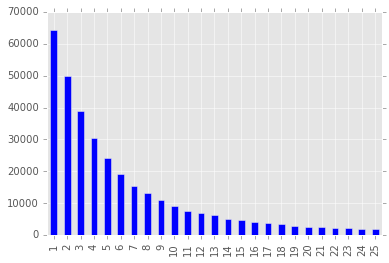

In [173]:
topn = pairs['n'].value_counts()
topn[:25].plot(kind='bar')

In [122]:
pairs.describe()

,n,year
count,370544.000000,370544.000000
mean,11.692512,2010.361166
std,28.437915,3.054802
min,1.000000,2005.000000
25%,2.000000,2008.000000
50%,5.000000,2011.000000
75%,11.000000,2013.000000
max,1582.000000,2015.000000


In [123]:

pairs2.describe()

,n
count,370544.000000
mean,11.692512
std,28.437915
min,1.000000
25%,2.000000
50%,5.000000
75%,11.000000
max,1582.000000


In [190]:
year = pairs['year'] == 2009
n = pairs['n'] > 10
pairs[year & n][['n']]

n
ta  tb      
0   1     11
    4     11
    8     26
    23    15
    26    11
    31    21
    38    25
    40    16
    45    11
    59    13
    80    14
    95    12
    114   14
    123   13
    136   46
    152   23
    174   38
    178   11
    188   12
    197   20
1   0     11
    4     14
    8     28
    23    13
    31    33
    38    23
    45    16
    52    18
    59    13
    64    12
...      ...
198 160   11
    163   30
    166   12
    167   14
    168   23
    169   27
    170   14
    171   14
    173   11
    174  111
    175   28
    176   42
    178   12
    182   26
    188   18
    189   28
    190   12
    191   14
    192   12
    194   13
    196   24
    197   26
199 8     18
    23    19
    38    16
    59    12
    100   13
    123   11
    136   24
    174   14

[8344 rows x 1 columns]

In [134]:
# Get total counts for each year, to adjust count data
yrtotals = pd.read_sql_query('SELECT doc_label as year, count(*) as n FROM doc GROUP BY year',conn,index_col='year')

In [152]:
# Define a new column for just acquired data
pairs.year_total = 0

In [132]:
# Populate the new column
for y in range(2005,2016):
    c = yrtotals.loc[str(y)]
    pairs.loc[pairs['year'] == y,'year_total'] = c.n

In [135]:
# Adjust the data (as percentage of total)
pairs['adj_n'] = pairs['n'] / pairs['year_total']

In [167]:
# Look at the results ...
pairs['adj_n'].describe()

count    3.705440e+05
mean              inf
std               NaN
min               inf
25%               inf
50%               inf
75%               inf
max               inf
Name: adj_n, dtype: float64

In [166]:
pairs.iloc[0,3].adj_n

ta  tb
0   3     inf
    3     inf
    3     inf
    3     inf
    3     inf
    3     inf
    3     inf
    3     inf
    3     inf
    3     inf
Name: adj_n, dtype: float64

In [8]:
test1 = pairs.loc[pairs['adj_n'] > 1,'adj_n']

In [8]:
test1.describe()

count    11474.000000
mean         2.025919
std          1.531631
min          1.100000
25%          1.200000
50%          1.500000
75%          2.100000
max         17.300000
Name: adj_n, dtype: float64

In [26]:
test2 = pairs.loc[pairs['adj_n'] > 2]

In [10]:
topics = pd.read_sql_query("SELECT topic_id, topic_alpha, topic_words FROM topic",conn,index_col='topic_id')

In [12]:
w1 = topics.ix[136].topic_words
w2 = topics.ix[8].topic_words
print(136,w1)
print(8,w2)

136 study important studies provide biological molecular understanding
8 high low potential strategy due efficient application


In [40]:
pairs.ix[8,136][['year','adj_n']]
pairs.ix[0,1].n

ta  tb
0   1      4
    1      1
    1      1
    1      2
    1     11
    1     10
    1     11
    1      8
    1     11
    1     23
    1      8
Name: n, dtype: int64

In [27]:
t = 0
for i in range(200):
    for j in range(i+1,200):
        t += 1
        if (t > 10):
            break
        try:
            x = pairs.ix[i,j].loc['year'==2015]
        except:
            print('No pair for',i,j)
            print(i,topics.ix[i].topic_words)
            print(j,topics.ix[j].topic_words)
            print('-'*20)
            continue
        v = x.adj_n
        print(t, v.values)
        '''
        if (pairs.ix[i,j].adj_n > 10):            
            print('High match for',i,j)
            print(i,topics.ix[i].topic_words)
            print(j,topics.ix[j].topic_words)
            print('-'*20)            
        '''
        

No pair for 0 1
0 methylation dna epigenetic histone gene chromatin expression
1 binding sites motifs motif rna transcription domains
--------------------
No pair for 0 2
0 methylation dna epigenetic histone gene chromatin expression
2 compounds acid compound derivatives activity methyl nmr
--------------------
No pair for 0 3
0 methylation dna epigenetic histone gene chromatin expression
3 patients serum healthy biomarkers controls samples diagnosis
--------------------
No pair for 0 4
0 methylation dna epigenetic histone gene chromatin expression
4 protein complex yeast proteins essential assembly function
--------------------
No pair for 0 5
0 methylation dna epigenetic histone gene chromatin expression
5 aring space resolution crystals crystal protein group
--------------------
No pair for 0 6
0 methylation dna epigenetic histone gene chromatin expression
6 genes reference expression gene normalization housekeeping stable
--------------------
No pair for 0 7
0 methylation dna epige